In [1]:
import pandas as pd

df = pd.read_csv('data6-3-2.csv')

In [4]:
from statsmodels.formula.api import ols # 다중선형회귀 모델(ols)

formula = 'temperature ~ solar + wind + o3'

model = ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.464
Date:                Wed, 26 Nov 2025   Prob (F-statistic):              0.229
Time:                        13:56:07   Log-Likelihood:                -195.45
No. Observations:                 100   AIC:                             398.9
Df Residuals:                      96   BIC:                             409.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.0507      1.994      9.555      0.000      15.093      23.008
solar          0.0039      0.015      0.251      0.802      -0.027       0.035
wind          -0.0252      0.090     -0.280      0.780      -0.204       0.153
o3             0.0749      0.036      2.079      0.040       0.003       0.146
==============================================================================
Omnibus:                        0.654   Durbin-Watson:                   2.328
Prob(Omnibus):                  0.721   Jarque-Bera (JB):                0.672
Skew:                           0.187   Prob(JB):                        0.715
Kurtosis:                       2.855   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
new_data = pd.DataFrame({
    'solar':[100],
    'wind':[5],
    'o3':[30]
})

pred = model.get_prediction(new_data)
pred.summary_frame(alpha=0.05) # 신뢰구간 95%

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,21.56163,0.175263,21.213737,21.909524,18.082985,25.040276


In [16]:
import pandas as pd

df = pd.read_csv('clam.csv')
df

,age,length,diameter,height,weight,gender
0,6,0.474627,0.211352,0.178189,78.971766,1
1,1,0.465847,0.339388,0.170522,98.781960,1
2,4,0.122807,0.238691,0.106924,88.792625,0
3,4,0.204579,0.360543,0.034261,1.028847,0
4,8,0.243458,0.358037,0.128080,6.503367,0
...,...,...,...,...,...,...
295,3,0.559766,0.390519,0.079062,57.877344,0
296,8,0.371229,0.355306,0.040285,31.909257,1
297,2,0.595571,0.104829,0.132500,4.924550,1
298,7,0.291551,0.289444,0.073238,51.474851,0


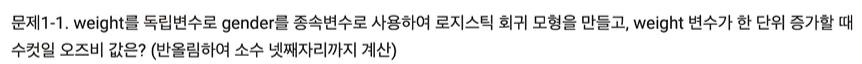

In [17]:
train = df.iloc[:210]
test = df.iloc[210:]

train.shape, test.shape

((210, 6), (90, 6))

In [13]:
from statsmodels.formula.api import logit # 로지스틱 회귀
import numpy as np

# 종속(y) ~ 독립(x)
model = logit('gender ~ weight', data=train).fit()
print(model.summary())

print(round(np.exp(0.0047), 4))

Optimization terminated successfully.
         Current function value: 0.690045
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 gender   No. Observations:                  210
Model:                          Logit   Df Residuals:                      208
Method:                           MLE   Df Model:                            1
Date:                Wed, 26 Nov 2025   Pseudo R-squ.:                0.003431
Time:                        17:48:37   Log-Likelihood:                -144.91
converged:                       True   LL-Null:                       -145.41
Covariance Type:            nonrobust   LLR p-value:                    0.3178
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3140      0.276     -1.137      0.256      -0.855       0.227
weight         0.0047      0.

In [18]:
model = logit('gender ~ weight', data=train).fit()
target = test.pop('gender')
pred = model.predict(test) > 0.5

Optimization terminated successfully.
         Current function value: 0.690045
         Iterations 4


In [19]:
import pandas as pd

df = pd.read_csv('system.csv')
df

,ERP,Feature1,Feature2,Feature3,CPU
0,135.281047,235.088034,44.462272,-36.532634,20.492369
1,108.003144,36.571914,46.409312,-21.709347,34.169811
2,119.574760,52.239055,66.494894,-30.590820,67.624248
3,144.817864,196.195890,59.828956,-33.400891,87.923476
4,137.351160,75.175619,59.601973,-26.668085,54.367805
...,...,...,...,...,...
95,114.131463,105.039508,67.053370,-33.807461,33.747738
96,100.210000,141.114900,51.465875,-25.710380,97.049369
97,135.717410,179.363130,58.744305,-24.294491,13.343943
98,102.538242,217.189747,44.008265,-22.667106,9.680395


In [20]:
cond = df['CPU'] < 100
df = df[cond]

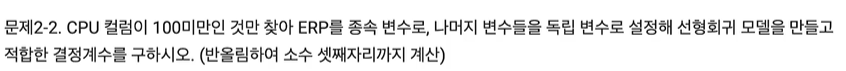

In [22]:
from statsmodels.formula.api import ols # 선형 회귀 > 결정계수(R-squared)

model = ols('ERP ~ Feature1 + Feature2 + Feature3 + CPU', data=df).fit()
print(model.summary())
# 0.226

                            OLS Regression Results                            
Dep. Variable:                    ERP   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     6.937
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           6.07e-05
Time:                        18:01:11   Log-Likelihood:                -429.44
No. Observations:                 100   AIC:                             868.9
Df Residuals:                      95   BIC:                             881.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.4348     15.094      4.932      0.0

In [23]:
import pandas as pd

df = pd.read_csv('churn.csv')
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,51,1,0,1.0,0,303.7,83,72.5,9.3,3.8
1,1,61,1,0,-0.2,2,194.8,89,66.3,10.9,13.3
2,0,84,1,1,-1.3,2,157.6,109,35.7,10.0,12.5
3,0,65,1,0,1.0,1,223.1,129,64.2,9.1,5.1
4,0,154,1,0,1.0,0,137.0,115,40.0,7.7,4.6
...,...,...,...,...,...,...,...,...,...,...,...
995,0,32,1,0,0.6,1,241.2,94,64.1,8.5,13.4
996,0,24,0,0,-1.1,1,155.2,97,48.5,9.8,8.3
997,0,67,1,0,1.9,3,184.6,69,45.8,7.3,8.5
998,0,72,1,0,1.0,0,153.2,65,34.8,9.6,14.5


In [27]:
from statsmodels.formula.api import logit # 로지스틱 회귀

formula = 'Churn ~ AccountWeeks + ContractRenewal + DataPlan + DataUsage + CustServCalls + DayMins + DayCalls + MonthlyCharge + OverageFee + RoamMins'
model = logit(formula, data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.393603
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      989
Method:                           MLE   Df Model:                           10
Date:                Thu, 27 Nov 2025   Pseudo R-squ.:                 0.02367
Time:                        19:28:49   Log-Likelihood:                -393.60
converged:                       True   LL-Null:                       -403.14
Covariance Type:            nonrobust   LLR p-value:                   0.03924
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2146      0.913     -2.425      0.015      -4.005      -0.424
AccountWeeks  

In [28]:
print((model.pvalues > 0.05).sum())

8


In [29]:
formula = 'Churn ~ DataUsage + DayMins'
model = logit(formula, data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.397599
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Thu, 27 Nov 2025   Pseudo R-squ.:                 0.01375
Time:                        19:33:15   Log-Likelihood:                -397.60
converged:                       True   LL-Null:                       -403.14
Covariance Type:            nonrobust   LLR p-value:                  0.003908
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0395      0.303     -3.434      0.001      -1.633      -0.446
DataUsage     -0.1697      0.

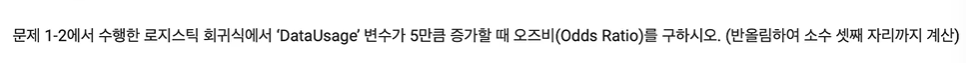

In [33]:
import numpy as np

coef = -0.1697

print(round(np.exp(coef * 5), 3))

0.428


In [43]:
import pandas as pd

df = pd.read_csv('piq.csv')
df.head()

,PIQ,Brain,Height,Weight
0,132,85.78,62.5,127
1,96,86.54,68.0,135
2,84,90.49,66.3,134
3,134,79.06,62.0,122
4,86,88.91,70.0,180


In [44]:
from statsmodels.formula.api import ols # 다중선형회귀 모델(ols)

formula = 'PIQ ~ Brain + Height + Weight'
model = ols(formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PIQ   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     9.024
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           8.25e-05
Time:                        19:41:25   Log-Likelihood:                -217.27
No. Observations:                  50   AIC:                             442.5
Df Residuals:                      46   BIC:                             450.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.5114     50.564      1.474      0.1

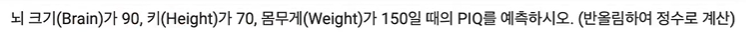

In [47]:
new_data = pd.DataFrame({
    'Brain' : [90],
    'Height' : [70],
    'Weight' : [150],
})

pred = model.predict(new_data)
pred

0    106.38302
dtype: float64

In [49]:
import pandas as pd 

train = pd.read_csv('design.csv')[:140]
test = pd.read_csv('design.csv')[140:]

train.shape, test.shape

((140, 7), (60, 7))

In [50]:
train

,id,design,c1,c2,c3,c4,c5
0,1,58.962471,0.374540,0.642032,0.103124,0.168935,0.707239
1,2,42.006534,0.950714,0.084140,0.902553,0.278590,0.152539
2,3,55.831980,0.731994,0.161629,0.505252,0.177010,0.576288
3,4,64.458592,0.598658,0.898554,0.826457,0.088703,0.606715
4,5,61.342792,0.156019,0.606429,0.320050,0.120636,0.424131
...,...,...,...,...,...,...,...
135,136,58.457931,0.323203,0.040729,0.944766,0.877201,0.272307
136,137,66.020866,0.518791,0.855461,0.849647,0.392445,0.018391
137,138,63.945956,0.703019,0.703658,0.247348,0.816599,0.914299
138,139,54.083051,0.363630,0.474174,0.450544,0.439135,0.117751


In [52]:
from statsmodels.formula.api import ols

formula = 'design ~ c1 + c2 + c3 + c4 + c5'
model = ols(formula, data=train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 design   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     9.697
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           6.37e-08
Time:                        20:54:15   Log-Likelihood:                -468.72
No. Observations:                 140   AIC:                             949.4
Df Residuals:                     134   BIC:                             967.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.0220      2.294     23.112      0.0

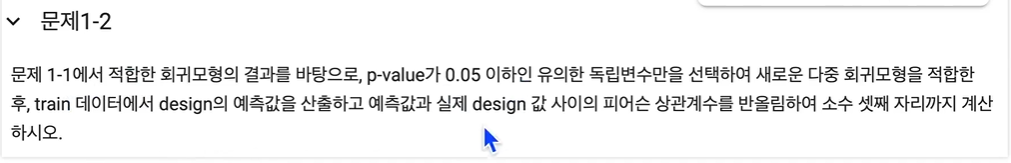

In [54]:
from statsmodels.formula.api import ols

formula = 'design ~ c1 + c2 + c4'
model = ols(formula, data=train).fit()
train['pred_train'] = model.predict(train)
train

,id,design,c1,c2,c3,c4,c5,pred_train
0,1,58.962471,0.374540,0.642032,0.103124,0.168935,0.707239,60.071154
1,2,42.006534,0.950714,0.084140,0.902553,0.278590,0.152539,51.703419
2,3,55.831980,0.731994,0.161629,0.505252,0.177010,0.576288,53.004302
3,4,64.458592,0.598658,0.898554,0.826457,0.088703,0.606715,61.348118
4,5,61.342792,0.156019,0.606429,0.320050,0.120636,0.424131,60.437781
...,...,...,...,...,...,...,...,...
135,136,58.457931,0.323203,0.040729,0.944766,0.877201,0.272307,58.005677
136,137,66.020866,0.518791,0.855461,0.849647,0.392445,0.018391,63.147029
137,138,63.945956,0.703019,0.703658,0.247348,0.816599,0.914299,63.191802
138,139,54.083051,0.363630,0.474174,0.450544,0.439135,0.117751,59.929248


In [55]:
train['design'].corr(train['pred_train'])

np.float64(0.5007184079013415)

In [56]:
from scipy.stats import pearsonr

pearsonr(train['design'], train['pred_train'])

PearsonRResult(statistic=np.float64(0.5007184079013414), pvalue=np.float64(2.9735899021963744e-10))

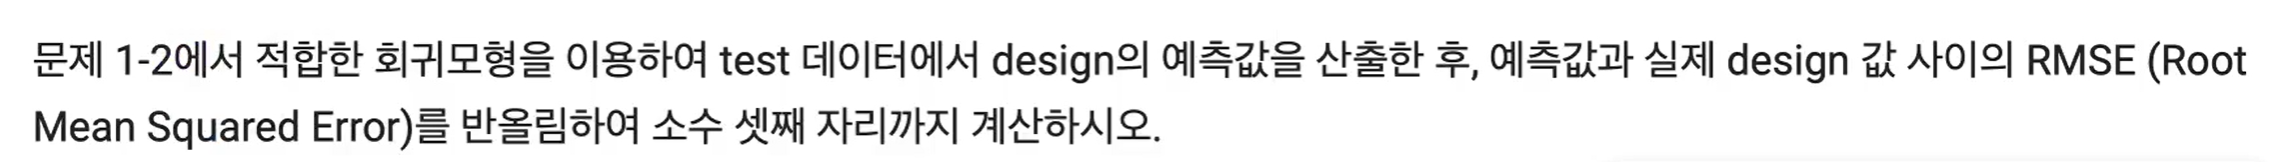

In [57]:
test['pred_design'] = model.predict(test)

In [58]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(test['design'], test['pred_design'])

8.48833611054516

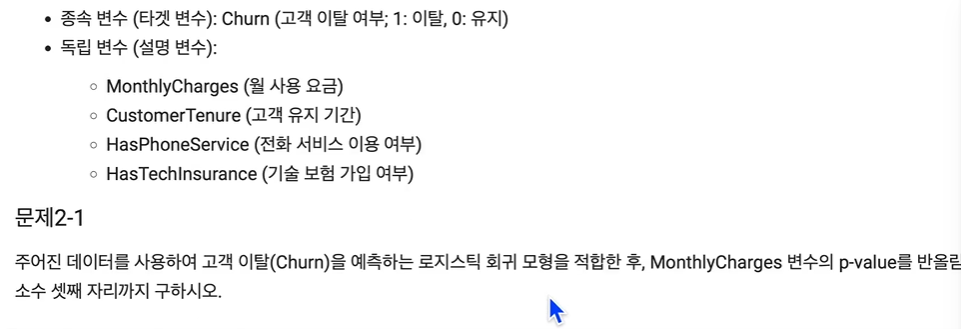

In [59]:
import pandas as pd

df = pd.read_csv('retention.csv')
df

,CustomerID,MonthlyCharges,CustomerTenure,HasPhoneService,HasTechInsurance,Churn
0,1,77.450712,47,1,1,1
1,2,67.926035,68,1,1,0
2,3,79.715328,45,0,1,1
3,4,92.845448,2,1,0,1
4,5,66.487699,27,1,1,0
...,...,...,...,...,...,...
75,76,82.328538,29,1,1,0
76,77,71.305706,63,1,0,1
77,78,65.514890,22,1,0,0
78,79,71.376412,26,0,0,1


In [61]:
from statsmodels.formula.api import logit

model = logit('Churn ~ MonthlyCharges + CustomerTenure + HasPhoneService + HasTechInsurance', data= df).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.582234
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                   80
Model:                          Logit   Df Residuals:                       75
Method:                           MLE   Df Model:                            4
Date:                Thu, 27 Nov 2025   Pseudo R-squ.:                  0.1585
Time:                        21:11:40   Log-Likelihood:                -46.579
converged:                       True   LL-Null:                       -55.352
Covariance Type:            nonrobust   LLR p-value:                  0.001513
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.4731      1.437     -3.114      0.002      -7.289      -1.657
MonthlyChar

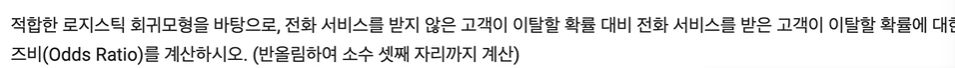

In [ ]:
import numpy as np # 오즈비

np.exp(model.params['HasPhoneService'])

np.float64(0.7005907598948918)

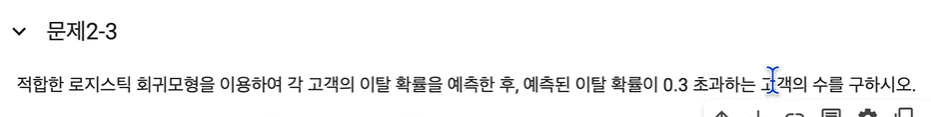

In [64]:
df = model.predict(df)
df

0     0.643397
1     0.733174
2     0.725944
3     0.480867
4     0.306304
        ...   
75    0.516097
76    0.810504
77    0.355781
78    0.556763
79    0.166611
Length: 80, dtype: float64

In [67]:
(df > 0.3).sum()

np.int64(65)